In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
COVIDmatrix = pd.read_csv('data/HHS_COVID19USWeeklyFlowsSum.csv', index_col = 0)
COVIDmatrix.index = COVIDmatrix.index.astype(str).str.zfill(3)
ACSmatrix = pd.read_csv('data/HHS_Flows.csv', index_col = 0)
ACSmatrix.index = ACSmatrix.index.astype(str).str.zfill(3)
print(set(COVIDmatrix.columns) - set(ACSmatrix.columns))
COVIDmatrix = COVIDmatrix.drop(index='109', columns='109')
print(set(COVIDmatrix.columns) == set(ACSmatrix.columns))
print(set(COVIDmatrix.index) == set(ACSmatrix.index))

{'109'}
True
True


In [2]:
dist_matrix = pd.read_csv('data/Haversine.csv', index_col = 0)
dist_matrix.index = dist_matrix.index.astype(str).str.zfill(3)

305
Correlation matrices for CPRadmission
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.671 -0.316     -0.143
ACS        0.671  1.000 -0.265     -0.126
CHECK     -0.316 -0.265  1.000     -0.016
Haversine -0.143 -0.126 -0.016      1.000



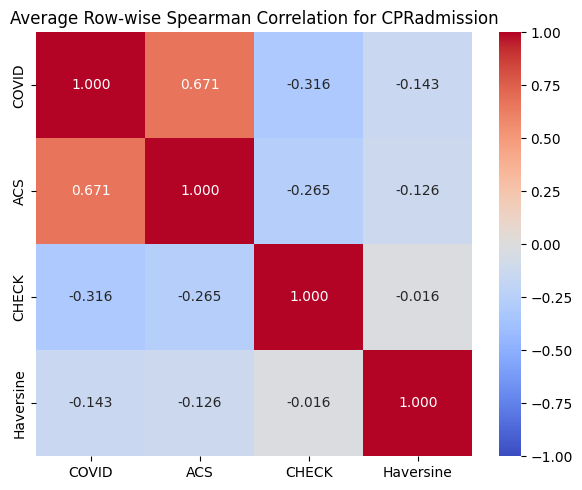

305
Correlation matrices for JHUcase
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.671 -0.148     -0.143
ACS        0.671  1.000 -0.150     -0.126
CHECK     -0.148 -0.150  1.000      0.172
Haversine -0.143 -0.126  0.172      1.000



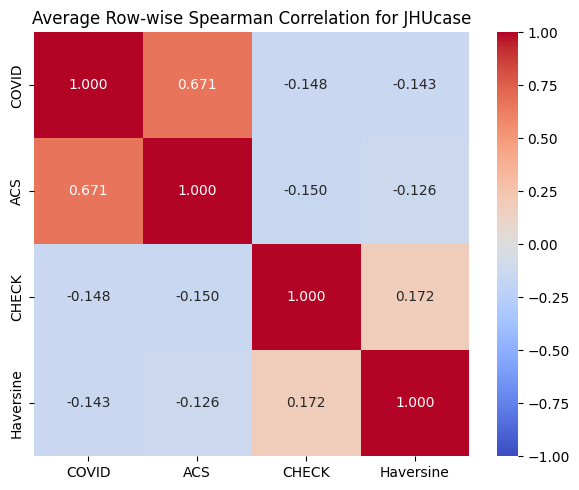

304
Correlation matrices for CHNGclaim
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.671 -0.306     -0.143
ACS        0.671  1.000 -0.263     -0.126
CHECK     -0.306 -0.263  1.000      0.031
Haversine -0.143 -0.126  0.031      1.000



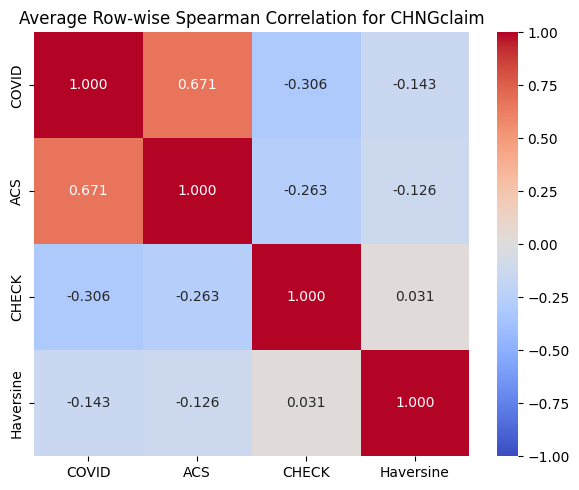

305
Correlation matrices for doctorvisits
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.671 -0.437     -0.143
ACS        0.671  1.000 -0.401     -0.126
CHECK     -0.437 -0.401  1.000     -0.110
Haversine -0.143 -0.126 -0.110      1.000



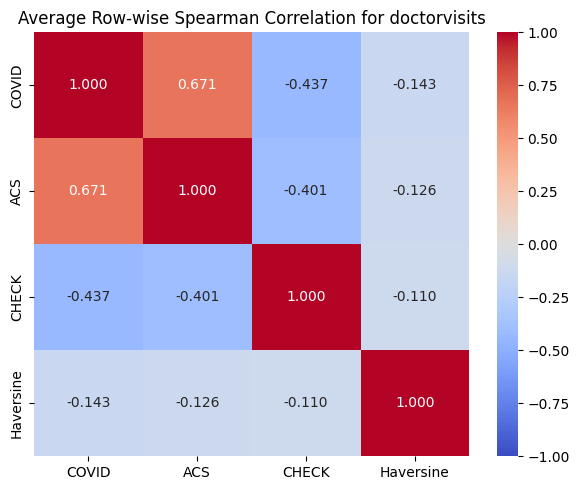

305
Correlation matrices for FBwtested
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.671 -0.395     -0.143
ACS        0.671  1.000 -0.382     -0.126
CHECK     -0.395 -0.382  1.000     -0.203
Haversine -0.143 -0.126 -0.203      1.000



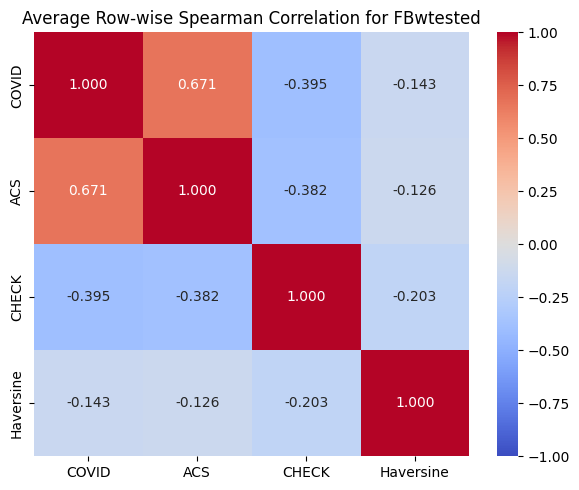

163
Correlation matrices for FBwhh
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.719  0.043     -0.476
ACS        0.719  1.000  0.048     -0.404
CHECK      0.043  0.048  1.000      0.106
Haversine -0.476 -0.404  0.106      1.000



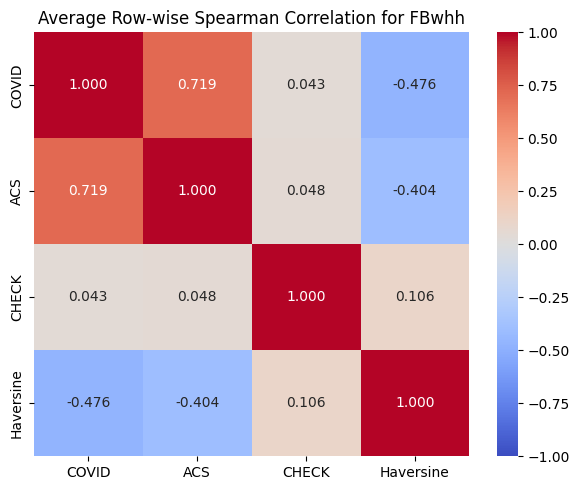

149
Correlation matrices for FBpositive
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.723  0.166     -0.505
ACS        0.723  1.000  0.183     -0.422
CHECK      0.166  0.183  1.000      0.170
Haversine -0.505 -0.422  0.170      1.000



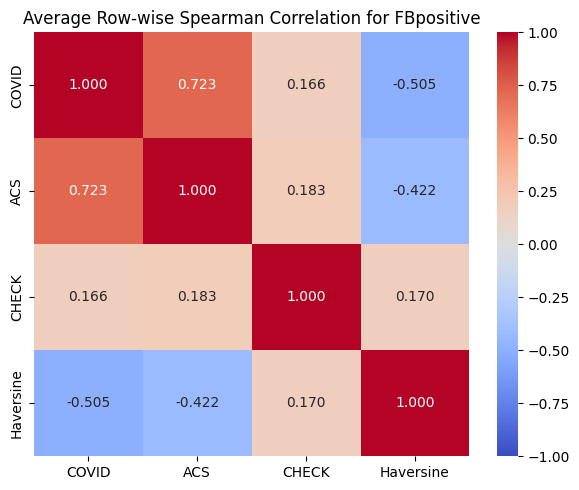

239
Correlation matrices for QUIDELpositive
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.674 -0.068     -0.240
ACS        0.674  1.000 -0.068     -0.181
CHECK     -0.068 -0.068  1.000      0.111
Haversine -0.240 -0.181  0.111      1.000



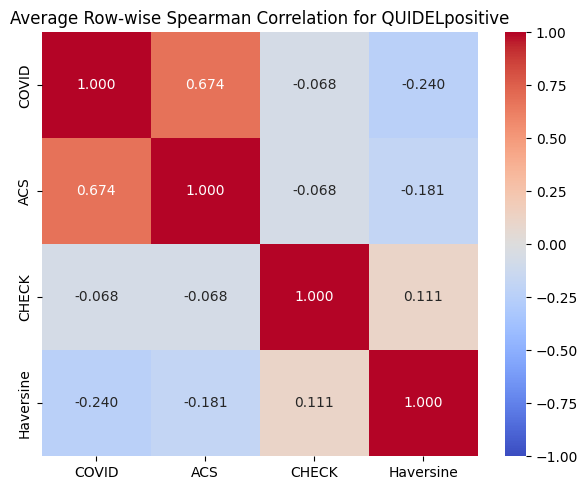

169
Correlation matrices for FBwcli
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID       1.00  0.710 -0.050     -0.470
ACS         0.71  1.000 -0.011     -0.398
CHECK      -0.05 -0.011  1.000      0.039
Haversine  -0.47 -0.398  0.039      1.000



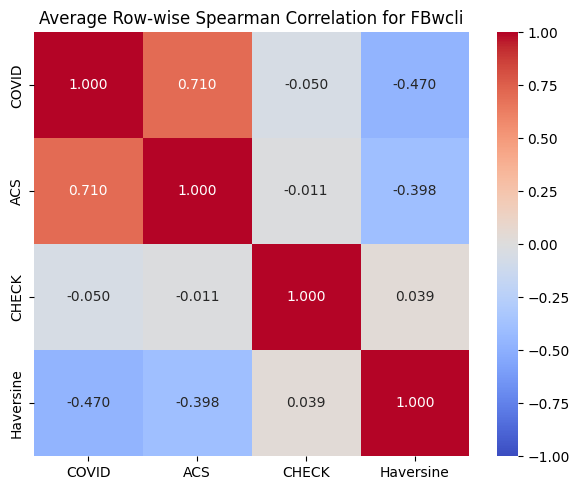

In [ ]:
import pandas as pd
from scipy import stats
YOURDTWPATH = ''
for signal in ['CPRadmission', 'JHUcase', 'CHNGclaim', 'doctorvisits', 'FBwtested', 'FBwhh', 'FBpositive', 'QUIDELpositive', 'FBwcli']:
    CHECKmatrix = pd.read_csv(f'{YOURDTWPATH}/{signal}.csv', index_col=0)
    CHECKmatrix.index = CHECKmatrix.index.astype(str).str.zfill(3)

    # Align matrices
    common = sorted(set(COVIDmatrix.index.astype(str)) & set(ACSmatrix.index.astype(str)) & set(CHECKmatrix.index.astype(str)) & set(dist_matrix.index.astype(str)))
    print(len(common))

    COVID = COVIDmatrix.loc[common, common].astype(float)
    ACS = ACSmatrix.loc[common, common].astype(float)
    CHECK = CHECKmatrix.loc[common, common].astype(float)
    Haversine = dist_matrix.loc[common, common].astype(float)

    tri_u = np.triu_indices(len(common), k=1)

    diag_c = np.diag(COVID)
    diag_a = np.diag(ACS)
    den_c = np.sqrt(diag_c[tri_u[0]] * diag_c[tri_u[1]])
    # den_c = diag_c[tri_u[0]] * diag_c[tri_u[1]]
    # den_c = 1
    den_a = np.sqrt(diag_a[tri_u[0]] * diag_a[tri_u[1]])
    # den_a = diag_a[tri_u[0]] * diag_a[tri_u[1]]
    # den_a = 1

    covid_undir = (COVID.values[tri_u] + COVID.values.T[tri_u]) / den_c
    acs_undir = (ACS.values[tri_u] + ACS.values.T[tri_u]) / den_a
    check_undir = CHECK.values[tri_u] + CHECK.values.T[tri_u]
    haversine_undir = Haversine.values[tri_u] + Haversine.values.T[tri_u]

    # Combine into DataFrame
    df = pd.DataFrame({
        'COVID': covid_undir,
        'ACS': acs_undir,
        'CHECK': check_undir,
        'Haversine': haversine_undir
    })

    # Pearson correlation
    pearson_corr = df.corr(method='pearson')
    # Spearman correlation
    spearman_corr = df.corr(method='spearman')

    print(f'Correlation matrices for {signal}')
    # print('--- Pearson ---')
    # print(pearson_corr.round(3))
    print('--- Spearman ---')
    print(spearman_corr.round(3))
    print()
    corr_matrix = spearman_corr.astype(float)  # Add this to ensure all values are proper floats
    # Visualize
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Average Row-wise Spearman Correlation for {signal}" )
    plt.tight_layout()
    plt.show()
